In [ ]:

!pip install -q opendatasets


In [ ]:

import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dsharma08k
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:08<00:00, 138MB/s]


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:

train_ds = keras.utils.image_dataset_from_directory(
    "/content/dogs-vs-cats/train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

val_ds = keras.utils.image_dataset_from_directory(
    "/content/dogs-vs-cats/train",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)


Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


In [ ]:

def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)


In [ ]:

data_augmentation = keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,648,193 (128.36 MB)

 Trainable params: 33,648,193 (128.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=callbacks)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.5366 - loss: 0.8142

500/500 ━━━━━━━━━━━━━━━━━━━━ 268s 518ms/step - accuracy: 0.5367 - loss: 0.8140 - val_accuracy: 0.6705 - val_loss: 0.6155
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.6495 - loss: 0.6334

500/500 ━━━━━━━━━━━━━━━━━━━━ 318s 525ms/step - accuracy: 0.6495 - loss: 0.6334 - val_accuracy: 0.7072 - val_loss: 0.5829
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.6973 - loss: 0.5865

500/500 ━━━━━━━━━━━━━━━━━━━━ 260s 520ms/step - accuracy: 0.6973 - loss: 0.5864 - val_accuracy: 0.7358 - val_loss: 0.5407
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.7245 - loss: 0.5474

500/500 ━━━━━━━━━━━━━━━━━━━━ 260s 517ms/step - accuracy: 0.7246 - loss: 0.5473 - val_accuracy: 0.7610 - val_loss: 0.5000
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.7535 - loss: 0.5095

500/500 ━━━━━━━━━━━━━━━━━━━━ 258s 516ms/step - accuracy: 0.7535 - loss: 0.5095 - val_accuracy: 0.7778 - val_loss: 0.4882
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.7613 - loss: 0.4943

500/500 ━━━━━━━━━━━━━━━━━━━━ 263s 518ms/step - accuracy: 0.7614 - loss: 0.4943 - val_accuracy: 0.7975 - val_loss: 0.4453
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.7770 - loss: 0.4660

500/500 ━━━━━━━━━━━━━━━━━━━━ 265s 524ms/step - accuracy: 0.7770 - loss: 0.4660 - val_accuracy: 0.8067 - val_loss: 0.4324
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.7938 - loss: 0.4551

500/500 ━━━━━━━━━━━━━━━━━━━━ 317s 515ms/step - accuracy: 0.7938 - loss: 0.4551 - val_accuracy: 0.8235 - val_loss: 0.4054
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 256s 504ms/step - accuracy: 0.8000 - loss: 0.4359 - val_accuracy: 0.8152 - val_loss: 0.4076
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.8082 - loss: 0.4195

500/500 ━━━━━━━━━━━━━━━━━━━━ 255s 510ms/step - accuracy: 0.8082 - loss: 0.4195 - val_accuracy: 0.8207 - val_loss: 0.3899
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.8149 - loss: 0.4175

500/500 ━━━━━━━━━━━━━━━━━━━━ 256s 512ms/step - accuracy: 0.8149 - loss: 0.4175 - val_accuracy: 0.8338 - val_loss: 0.3740
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.8226 - loss: 0.3961

500/500 ━━━━━━━━━━━━━━━━━━━━ 262s 512ms/step - accuracy: 0.8226 - loss: 0.3961 - val_accuracy: 0.8450 - val_loss: 0.3650
Epoch 13/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.8306 - loss: 0.3842

500/500 ━━━━━━━━━━━━━━━━━━━━ 263s 514ms/step - accuracy: 0.8306 - loss: 0.3841 - val_accuracy: 0.8453 - val_loss: 0.3593
Epoch 14/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 250s 500ms/step - accuracy: 0.8347 - loss: 0.3787 - val_accuracy: 0.8347 - val_loss: 0.3629
Epoch 15/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 252s 503ms/step - accuracy: 0.8432 - loss: 0.3593 - val_accuracy: 0.8425 - val_loss: 0.3652
Epoch 16/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 257s 514ms/step - accuracy: 0.8422 - loss: 0.3570 - val_accuracy: 0.8198 - val_loss: 0.3996


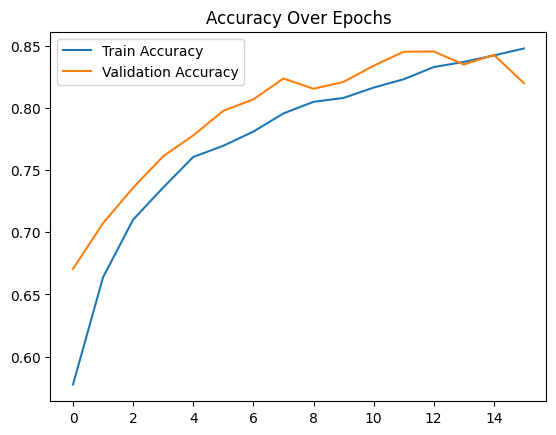

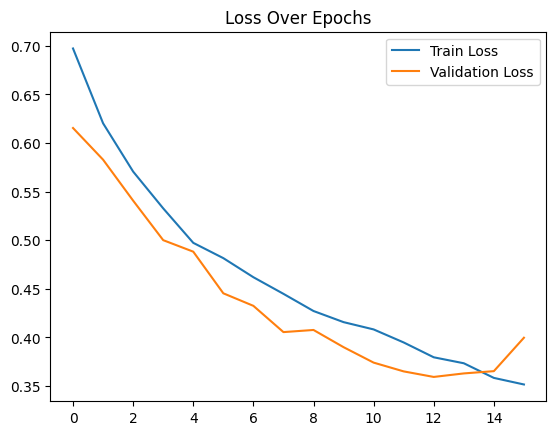

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()


In [ ]:
# Safely evaluate without shuffling or batching
val_unbatched = val_ds.unbatch().batch(1)

y_true = []
y_pred = []

for x, y in val_unbatched:
    pred = model.predict(x, verbose=0)
    y_true.append(int(y.numpy()[0]))
    y_pred.append(int(pred[0][0] > 0.5))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


[[1552  414]
 [ 205 1829]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1966
           1       0.82      0.90      0.86      2034

    accuracy                           0.85      4000
   macro avg       0.85      0.84      0.84      4000
weighted avg       0.85      0.85      0.84      4000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


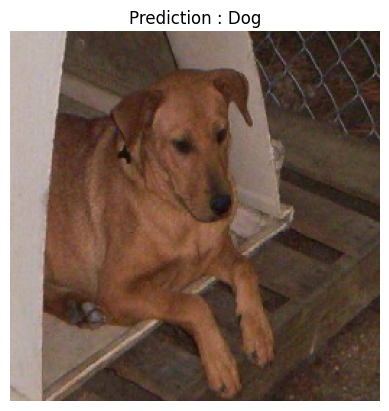

In [ ]:

img_path = "/content/dogs-vs-cats/test/dogs/dog.100.jpg"
img = keras.utils.load_img(img_path, target_size=(256, 256))
img_array = keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
pred = model.predict(img_array)
pred_class = 1 if pred > 0.5 else 0

plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction : {'Dog' if pred_class else 'Cat'}")
plt.show()


In [ ]:
model.save("best_model.keras")